# Notebook I used during the course [Data Driven Astronomy by Coursera](https://www.coursera.org/learn/data-driven-astronomy)

This notebook contains the code of the projects made during this course

## Week 1

In [1]:
# Write your greet function definition below:

def greet(w):
  return 'Hello, '+ w + '!'

# Any code inside the if statement will be ignored by the automarker.
# Put your test code in here, since it will be run by clicking Run or Terminal.
if __name__ == '__main__':
  print(greet('World'))
  print(greet('Grok'))
  print(greet('123'))

Hello, World!
Hello, Grok!
Hello, 123!


In [ ]:
import numpy as np

def mean_datasets(file_list):
    # Verificar que hay al menos dos archivos en la lista
    if len(file_list) < 2:
        raise ValueError("Se requieren al menos dos archivos en la lista.")

    # Leer el primer archivo para obtener las dimensiones
    first_file = np.genfromtxt(file_list[0], delimiter=',', skip_header=True)
    rows, columns = first_file.shape

    # Inicializar una matriz para almacenar la suma de los valores
    sum_matrix = np.zeros((rows, columns))

    # Iterar sobre los archivos y acumular las sumas
    for file in file_list:
        current_matrix = np.genfromtxt(file, delimiter=',', skip_header=True)
        sum_matrix += current_matrix

    # Calcular la media y redondear a un decimal
    mean_matrix = np.round(sum_matrix / len(file_list), 1)

    return mean_matrix

# Ejemplos de uso:
result1 = mean_datasets(['data1.csv', 'data2.csv', 'data3.csv'])
print(result1)

result2 = mean_datasets(['data4.csv', 'data5.csv', 'data6.csv'])
print(result2)


In [ ]:
def list_stats(w):
  w.sort()
  if len(w) % 2 == 0:
    mid = len(w)//2
    median = (w[mid - 1] + w[mid])/2
    mean = sum(w)/len(w)
  else:
    mid = len(w)//2
    median = w[mid]
    mean = sum(w)/len(w)
  return median, mean


# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with the first example in the question.
  m = list_stats([1.3, 2.4, 20.6, 0.95, 3.1])
  print(m)

  # Run your function with the second example in the question
  m = list_stats([1.5])
  print(m)

In [ ]:
import numpy as np
import statistics
import time

def time_stat(func, size, ntrials):
  # the time to generate the random array should not be included
  
  c=0
  end=0
  # modify this function to time func with ntrials times using a new random array each time
  while c<=(ntrials):
    data = np.random.rand(size)
    start = time.perf_counter()
    res = func(data)
    end += time.perf_counter() - start
    c+=1
  # return the average run time
  return end/ntrials

if __name__ == '__main__':
  print('{:.6f}s for statistics.mean'.format(time_stat(statistics.mean, 10**5, 10)))
  print('{:.6f}s for np.mean'.format(time_stat(np.mean, 10**5, 1000)))


In [ ]:
import time, numpy as np
from astropy.io import fits

def median_fits(filenames):

  start = time.time()   # Start timer
  # Read in all the FITS files and store in list
  FITS_list = []
  for filename in filenames: 
    hdulist = fits.open(filename)
    FITS_list.append(hdulist[0].data)
    hdulist.close()

  # Stack image arrays in 3D array for median calculation
  FITS_stack = np.dstack(FITS_list)

  median = np.median(FITS_stack, axis=2)

  # Calculate the memory consumed by the data
  memory = FITS_stack.nbytes
  # or, equivalently:
  #memory = 200 * 200 * len(filenames) * FITS_stack.itemsize

  # convert to kB:
  memory /= 1024
  
  stop = time.time() - start   # stop timer
  return median, stop, memory
  


# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with first example in the question.
  result = median_fits(['image0.fits', 'image1.fits'])
  #print(result)
  print(result[0][100, 100], result[1], result[2])
  
  # Run your function with second example in the question.
  result = median_fits(['image{}.fits'.format(str(i)) for i in range(11)])
  print(result[0][100, 100], result[1], result[2])

In [ ]:
import numpy as np
def median_bins(lis, N):
  mean = np.mean(lis)
  std = np.std(lis)
  minval = mean -std
  maxval = mean + std
  width = 2*std/N
  bins = np.zeros(N)
  ibin=0
  for i in lis:
    if i < minval:
      ibin += 1
    elif i < maxval:
      bin = int((i-minval)/width)
      bins[bin] +=1
  
  return mean, std, ibin, bins
  
def median_approx(lis,N):
  mean, std, ibin, bins = median_bins(lis, N)
  B = len(lis)
  mid = (B + 1)/2

  count = ibin
  for b, bincount in enumerate(bins):
    count += bincount
    if count >= mid:
      # Stop when the cumulative count exceeds the midpoint
        break

  width = 2*std/N
  median = mean - std + width*(b + 0.5)
  return median




# You can use this to test your functions.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your functions with the first example in the question.
  print(median_bins([1, 1, 3, 2, 2, 6], 3))
  print(median_approx([1, 1, 3, 2, 2, 6], 3))

  # Run your functions with the second example in the question.
  print(median_bins([1, 5, 7, 7, 3, 6, 1, 1], 4))
  print(median_approx([1, 5, 7, 7, 3, 6, 1, 1], 4))


In [ ]:
import time, numpy as np
from astropy.io import fits



def median_bins_fits(filenames, B):
  # Calculate the mean and standard dev
  mean, std = running_stats(filenames)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Initialise bins
  left_bin = np.zeros(dim)
  bins = np.zeros((dim[0], dim[1], B))
  bin_width = 2 * std / B 

  # Loop over all FITS files
  for filename in filenames:
      hdulist = fits.open(filename)
      data = hdulist[0].data

      # Loop over every point in the 2D array
      for i in range(dim[0]):
        for j in range(dim[1]):
          value = data[i, j]
          mean_ = mean[i, j]
          std_ = std[i, j]

          if value < mean_ - std_:
            left_bin[i, j] += 1
                
          elif value >= mean_ - std_ and value < mean_ + std_:
            bin = int((value - (mean_ - std_))/bin_width[i, j])
            bins[i, j, bin] += 1

  return mean, std, left_bin, bins


def median_approx_fits(filenames, B):
  mean, std, left_bin, bins = median_bins_fits(filenames, B)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Position of the middle element over all files
  N = len(filenames)
  mid = (N + 1)/2
	
  bin_width = 2*std / B
  # Calculate the approximated median for each array element
  median = np.zeros(dim)   
  for i in range(dim[0]):
    for j in range(dim[1]):    
      count = left_bin[i, j]
      for b, bincount in enumerate(bins[i, j]):
        count += bincount
        if count >= mid:
          # Stop when the cumulative count exceeds the midpoint
          break
      median[i, j] = mean[i, j] - std[i, j] + bin_width[i, j]*(b + 0.5)
      
  return median

## Week 2

In [4]:
# Write your hms2dec and dms2dec functions here

def hms2dec(h,m,s):
  return 15*(h+m/60+s/(60*60))


def dms2dec(h,m,s):
  if h<0:
    return -1*(-1*h+m/60+s/(60*60))
  elif h>=0:
    return h+m/60+s/(60*60)


# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # The first example from the question
  print(hms2dec(23, 12, 6))

  # The second example from the question
  print(dms2dec(22, 57, 18))

  # The third example from the question
  print(dms2dec(-66, 5, 5.1))

348.025
22.955
-66.08475


In [3]:
def angular_dist(ra1, dec1, ra2, dec2):
  import numpy as np
  r1,d1,r2,d2=np.radians(ra1), np.radians(dec1), np.radians(ra2), np.radians(dec2)
  a=np.sin(np.abs(d1-d2)/2)**2
  b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1 - r2)/2)**2
  d = 2*np.arcsin(np.sqrt(a + b))
  return np.degrees(d)

# You can use this to test your function.
# Any code inside this `if` statement will be ignored by the automarker.
if __name__ == '__main__':
  # Run your function with the first example in the question.
  print(angular_dist(21.07, 0.1, 21.15, 8.2))

  # Run your function with the second example in the question
  print(angular_dist(10.3, -3, 24.3, -29))

8.100392318146504
29.208498180546595


## Week 3

## Week 4

This 2 weeks where Postrgres SQL

## Week 5

## 5a

In [21]:
import numpy as np

def get_features_targets(data):
  # complete this function
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']

    targets = data['redshift']
  
    return features, targets


if __name__ == "__main__":
  # load the data
  data = np.load('sdss_galaxy_colors.npy')
    
  # call our function 
  features, targets = get_features_targets(data)
    
  # print the shape of the returned arrays
  print(features[:2])
  print(targets[:2])

[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# copy in your get_features_targets function here

def get_features_targets(data):
  # complete this function
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']

    targets = data['redshift']
  
    return features, targets
# load the data and generate the features and targets
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)
  
# initialize model
dtr = DecisionTreeRegressor()
# train the model
dtr.fit(features, targets)
# make predictions using the same features
predictions = dtr.predict(features)
# print out the first 4 predicted redshifts
print(predictions[:4])

[0.539301   0.1645703  0.04190006 0.04427702]


In [ ]:
def median_diff(predicted, actual):
  return np.median(abs(predicted-actual))

# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
  # split the data into training and testing features and predictions
  split = features.shape[0]//2
  train_features = features[:split]
  test_features = features[split:]
  train_targets = targets[:split]
  test_targets = targets[split:]
  # train the model
  model.fit(train_features,train_targets)
  # get the predicted_redshifts
  predictions = model.predict(test_features)
  # use median_diff function to calculate the accuracy
  return median_diff(test_targets, predictions)


if __name__ == "__main__":
  data = np.load('sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor()

  # validate the model and print the med_diff
  diff = validate_model(dtr, features, targets)
  print('Median difference: {:f}'.format(diff))


import numpy as np
import pydotplus as pydotplus
from sklearn.tree import DecisionTreeRegressor,export_graphviz

def get_features_targets(data):
    features = np.zeros(shape=(len(data), 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets = data['redshift']
    return features, targets


if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # Initialize model
    dtr = DecisionTreeRegressor(max_depth=3)    # We will come to this input in the next tutorial

    # Split the data into training and testing
    split_index = int(0.5 * len(features))
    train_features = features[:split_index]
    train_targets = targets[:split_index]

    dtr.fit(train_features, train_targets)

    dot_data = export_graphviz(dtr, out_file=None,feature_names=['u - g', 'g - r', 'r - i', 'i - z'])
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_jpg("decision_tree.jpg")

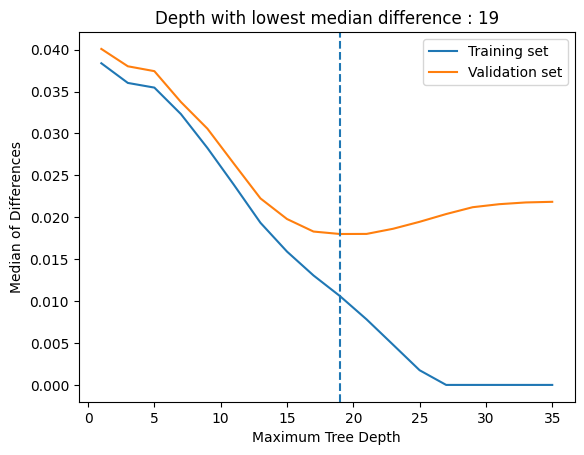

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  # complete this function
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']

    targets = data['redshift']
  
    return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(abs(predicted-actual))

# Complete the following function
def accuracy_by_treedepth(features, targets, depths):
  # split the data into testing and training sets
  split = features.shape[0]//2
  train_features = features[:split]
  test_features = features[split:]
  train_targets = targets[:split]
  test_targets = targets[split:]
  # initialise arrays or lists to store the accuracies for the below loop
  traccuaracies= []
  tesccuaracies= []
  # loop through depths
  for depth in depths:
    # initialize model with the maximum depth. 
    dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
    dtr.fit(train_features,train_targets)
    # get the predictions for the training set and calculate their median_diff
    predtrain = dtr.predict(train_features)
    traccuaracies.append(median_diff(train_targets, predtrain))
    # get the predictions for the testing set and calculate their median_diff
    predtest = dtr.predict(test_features)
    tesccuaracies.append(median_diff(test_targets, predtest))
  # return the accuracies for the training and testing sets
  return traccuaracies, tesccuaracies


if __name__ == "__main__":
  data = np.load('sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # Generate several depths to test
  tree_depths = [i for i in range(1, 36, 2)]

  # Call the function
  train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
  
    
  # Plot the results
  train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
  test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
  plt.title("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))
  plt.xlabel("Maximum Tree Depth")
  plt.axvline(x=tree_depths[test_med_diffs.index(min(test_med_diffs))], linestyle='--')
  plt.ylabel("Median of Differences")
  plt.legend()
  plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
def get_features_targets(data):
  # complete this function
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']

    targets = data['redshift']
  
    return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(abs(predicted-actual))

# complete this function
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  ac = []
  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    # fit the model for the current set
    model.fit(train_features,train_targets)
    # predict using the model
    pred = model.predict(test_features)
    # calculate the median_diff from predicted values and append to results array
    ac.append(median_diff(pred, test_targets))
 
  # return the list with your median difference values
  return ac

if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model with a maximum depth of 19
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  diffs = cross_validate_model(dtr, features, targets, 10)

  # Print the values
  print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
  print('Mean difference: {:.3f}'.format(np.mean(diffs)))

Median difference: 0.017


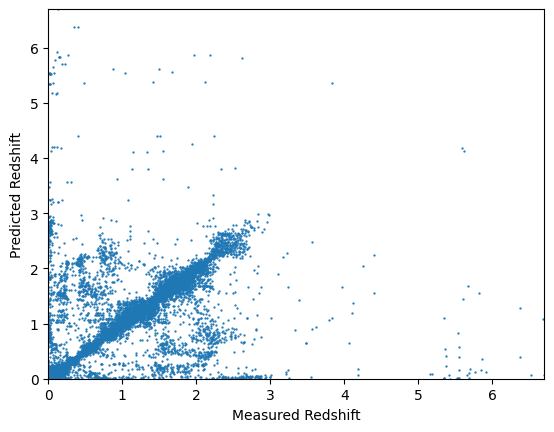

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

def get_features_targets(data):
  # complete this function
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']

    targets = data['redshift']
  
    return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(abs(predicted-actual))

# complete this function
def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    model.fit(train_features,train_targets)
    # predict using the model
    predictions = model.predict(test_features)
    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions    


if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  predictions = cross_validate_predictions(dtr, features, targets, 10)

  # calculate and print the rmsd as a sanity check
  diffs = median_diff(predictions, targets)
  print('Median difference: {:.3f}'.format(diffs))

  # plot the results to see how well our model looks
  plt.scatter(targets, predictions, s=0.4)
  plt.xlim((0, targets.max()))
  plt.ylim((0, predictions.max()))
  plt.xlabel('Measured Redshift')
  plt.ylabel('Predicted Redshift')
  plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  # complete this function
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']

    targets = data['redshift']
  
    return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(abs(predicted-actual))

# complete this function
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    model.fit(train_features,train_targets)
    # predict using the model
    predictions = model.predict(test_features)
    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions    

# complete this function
def split_galaxies_qsos(data):
  # split the data into galaxies and qsos arrays
  data = np.load('sdss_galaxy_colors.npy')
  galaxies = data[data['spec_class'] == b'GALAXY']
  qsos = data[data['spec_class'] == b'QSO']
  # return the seperated galaxies and qsos arrays
  return galaxies, qsos


def cross_validate_median_diff(data):
  features, targets = get_features_targets(data)
  dtr = DecisionTreeRegressor(max_depth=19)
  return np.mean(cross_validate_model(dtr, features, targets, 10))

if __name__ == "__main__":
    data = np.load('./sdss_galaxy_colors.npy')

    # Split the data set into galaxies and QSOs
    galaxies, qsos= split_galaxies_qsos(data)

    # Here we cross validate the model and get the cross-validated median difference
    # The cross_validated_med_diff function is in "written_functions"
    galaxy_med_diff = cross_validate_median_diff(galaxies)
    qso_med_diff = cross_validate_median_diff(qsos)

    # Print the results
    print("Median difference for Galaxies: {:.3f}".format(galaxy_med_diff))
    print("Median difference for QSOs: {:.3f}".format(qso_med_diff))


## Week 6

In [ ]:
import numpy as np

def splitdata_train_test(data, fraction_training):
  # complete this function
  np.random.seed(0)
  np.random.shuffle(data)
  training = data[0:int(len(data)*fraction_training)]
  testing = data[int(len(data)*fraction_training):]
  return training, testing
  

if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # set the fraction of data which should be in the training set
  fraction_training = 0.7

  # split the data using your function
  training, testing = splitdata_train_test(data, fraction_training)

  # print the key values
  print('Number data galaxies:', len(data))
  print('Train fraction:', fraction_training)
  print('Number of galaxies in training set:', len(training))
  print('Number of galaxies in testing set:', len(testing))

In [ ]:
import numpy as np

def generate_features_targets(data):
  # complete the function by calculating the concentrations

  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  features, targets = generate_features_targets(data)

  # Print the shape of each array to check the arrays are the correct dimensions. 
  print("Features shape:", features.shape)
  print("Targets shape:", targets.shape)


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# copy your splitdata_train_test function here
def splitdata_train_test(data, fraction_training):
  # complete this function
  np.random.seed(0)
  np.random.shuffle(data)
  training = data[0:int(len(data)*fraction_training)]
  testing = data[int(len(data)*fraction_training):]
  return training, testing

# copy your generate_features_targets function here
def generate_features_targets(data):
  # complete the function by calculating the concentrations

  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


# complete this function by splitting the data set and training a decision tree classifier
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
  training, testing = splitdata_train_test(data,0.7)
  # generate the feature and targets for the training and test sets
  # i.e. train_features, train_targets, test_features, test_targets
  train_features, train_targets=generate_features_targets(training)
  test_features, test_targets=generate_features_targets(testing)

  # instantiate a decision tree classifier
  dtc = DecisionTreeClassifier()
  # train the classifier with the train_features and train_targets
  dtc.fit(train_features,train_targets)
  # get predictions for the test_features
  predictions = dtc.predict(test_features)
  # return the predictions and the test_targets
  return predictions, test_targets


if __name__ == '__main__':
  data = np.load('galaxy_catalogue.npy')
    
  predicted_class, actual_class = dtc_predict_actual(data)

  # Print some of the initial results
  print("Some initial results...\n   predicted,  actual")
  for i in range(20):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from support_functions import plot_confusion_matrix, generate_features_targets


# Implement the following function
def calculate_accuracy(predicted, actual):
  correct = 0
  for i in range(len(actual)):
    if predicted[i]==actual[i]:
      correct+=1
  return correct/len(predicted)


if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # split the data
  features, targets = generate_features_targets(data)

  # train the model to get predicted and actual classes
  dtc = DecisionTreeClassifier()
  predicted = cross_val_predict(dtc, features, targets, cv=10)

  # calculate the model score using your function
  model_score = calculate_accuracy(predicted, targets)
  print("Our accuracy score:", model_score)

  # calculate the models confusion matrix using sklearns confusion_matrix function
  class_labels = list(set(targets))
  model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

  # Plot the confusion matrix using the provided functions.
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from support_functions import generate_features_targets, plot_confusion_matrix, calculate_accuracy


# complete this function to get predictions from a random forest classifier
def rf_predict_actual(data, n_estimators):
  # generate the features and targets
  features, targets = generate_features_targets(data)
  # instantiate a random forest classifier using n estimators
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  # get predictions using 10-fold cross validation with cross_val_predict
  predictions = cross_val_predict(rfc, features, targets,cv=10)
  # return the predictions and their actual classes
  return predictions, targets

if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # get the predicted and actual classes
  number_estimators = 50              # Number of trees
  predicted, actual = rf_predict_actual(data, number_estimators)

  # calculate the model score using your function
  accuracy = calculate_accuracy(predicted, actual)
  print("Accuracy score:", accuracy)

  # calculate the models confusion matrix using sklearns confusion_matrix function
  class_labels = list(set(actual))
  model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

  # plot the confusion matrix using the provided functions.
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()
